[ベイズ最適化入門](https://qiita.com/masasora/items/cc2f10cb79f8c0a6bbaa)  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2.
A few modifications to fit it to python3 are needed.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys

np.random.seed(seed=123)

%matplotlib inline

In [55]:
#### kernel
def my_kernel(xn,xm,a1=200.0,a2=0.1,a3=1.0,a4=10.0):
    return a1*np.exp(-a2*0.5*(xn - xm)**2)

### Gaussian process
def pred(_x_sample,_y_sample, _x):
    K = np.zeros([len(_x_sample),len(_x_sample)])
    for i in range(len(_x_sample)):
        for j in range(len(_x_sample)):
            K[i,j] = my_kernel(_x_sample[i], _x_sample[j])
    mu = 0.0*_x
    var = 0.0*_x
    aux = 0.0*_x_sample
    for i in range(len(_x)):
    ### gram matrix
        for j in range(len(_x_sample)):
            aux[j] = my_kernel(_x_sample[j], _x[i])
        mu[i] = np.dot(aux,np.dot(np.linalg.inv(K),_y_sample))
        var[i] = my_kernel(_x[i],_x[i]) - np.dot(aux, np.dot(np.linalg.inv(K + np.identity(len(_x_sample))), aux))
    return mu, var

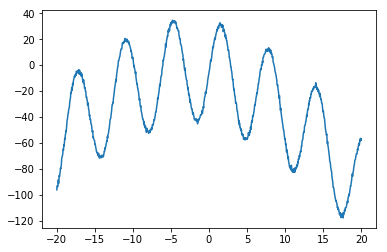

In [56]:
def generate_sample(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)

x = np.linspace(-20,20,1000)
z = list(map(generate_sample,x)) #for python3 
#z = generate_sample(x)
plt.plot(x, z) #### plot true data
plt.show()
#sys.exit()

#### PI
def aqui2(_mean, _var, _maxval):
    _lamb = (_mean -  _maxval- 0.01)/(var*1.0)
    _z = norm.cdf(_lamb)
    #_z = np.array([norm.cdf(_lamb[i]) for  i in range(len(_lamb))])
    return _z

#### EI
def aqui1(_mean, _var, _maxval):
    _lamb = (_mean -  _maxval)/(_var*1.0)
    #_z = np.array([(mean[i] -  _maxval)*norm.cdf(_lamb[i]) + _var[i]*norm.pdf(_lamb[i]) for i in range(len(_lamb))])
    _z = (_mean - maxval)*norm.cdf(_lamb) + _var*norm.pdf(_lamb)
    return _z

#### UCB
def aqui3(_mean, _var, _maxval):
    return _mean+1.0*_var

x_point, maxval = 9.68836939984255,  Initial
x_point, maxval = [-20.00614447],  -46.090564309299886
x_point, maxval = [-4.89835756],  -46.090564309299886
x_point, maxval = [20.00232789],  33.03723672071452
x_point, maxval = [1.46304811],  33.03723672071452
x_point, maxval = [-11.27556007],  33.03723672071452
x_point, maxval = [14.78923239],  33.03723672071452
x_point, maxval = [5.19445693],  33.03723672071452
x_point, maxval = [-15.1216457],  33.03723672071452
x_point, maxval = [-1.73475025],  33.03723672071452
x_point, maxval = [-7.90751878],  33.03723672071452
x_point, maxval = [2.38424824],  33.03723672071452
x_point, maxval = [-12.51407525],  33.03723672071452
x_point, maxval = [-4.70121324],  33.03723672071452
x_point, maxval = [-4.54364073],  35.084112464457775


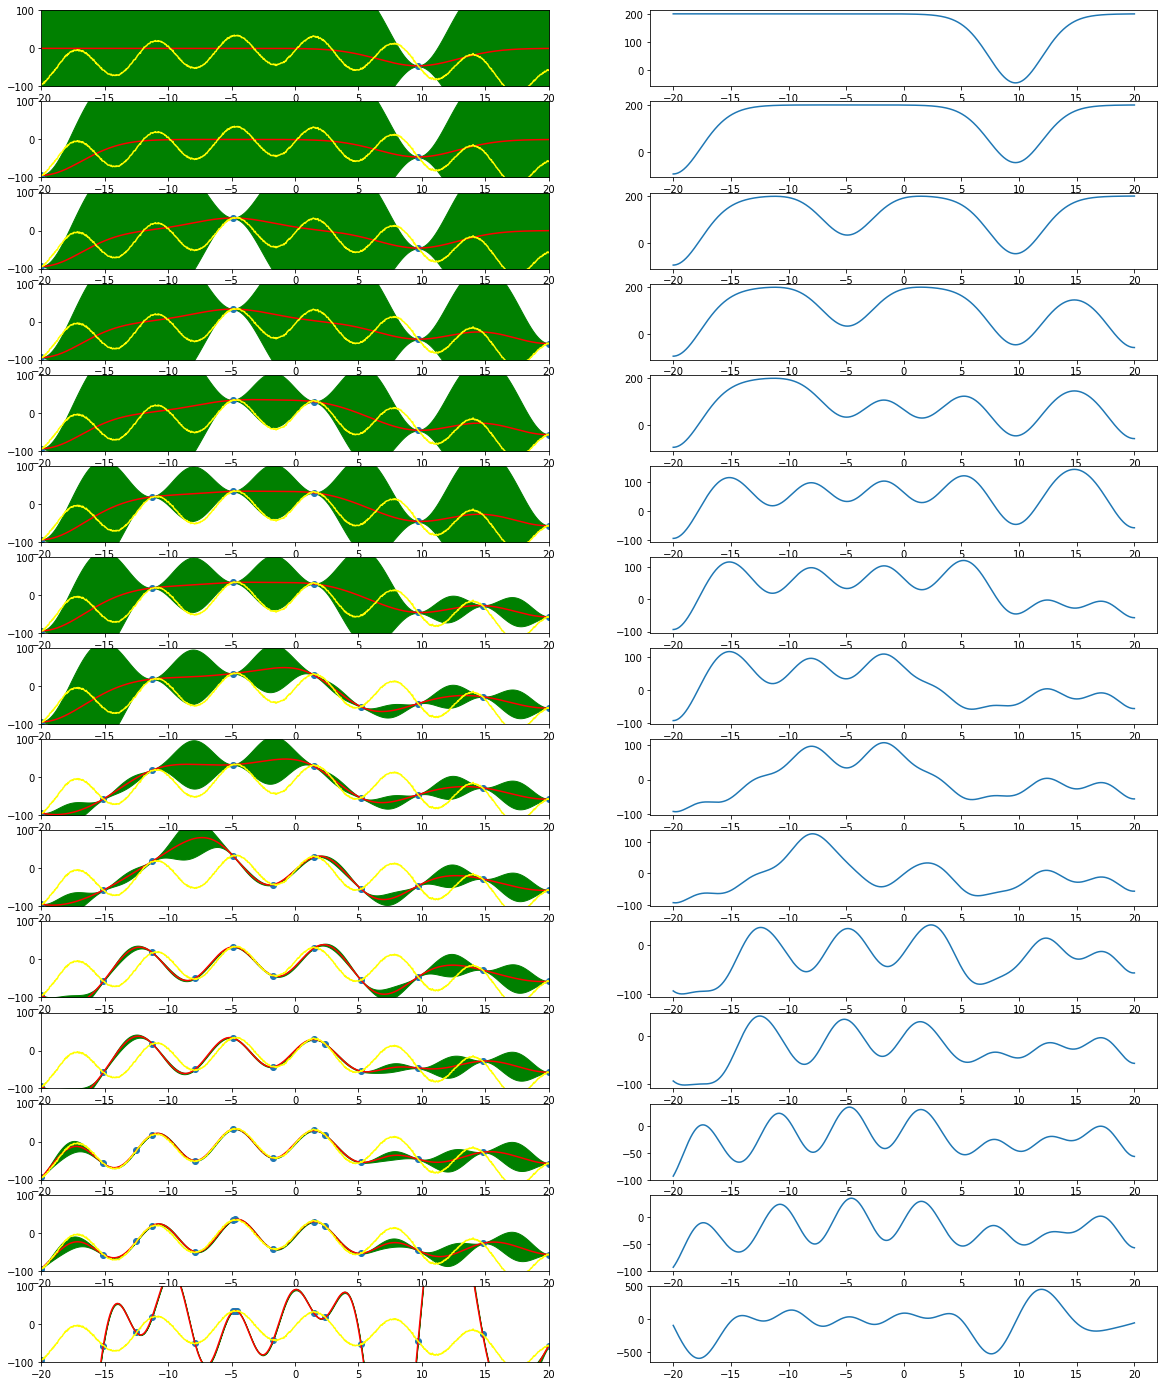

finish


In [57]:
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20)
epoch=15
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)
        print ("x_point, maxval = "+str(x_point)+',  '+str(maxval))
        y_point = generate_sample(x_point)
        y_sample = np.append(y_sample,y_point)
    mean, var = pred(x_sample, y_sample, x)
    maxval = max(y_sample)
    accui = aqui3(mean, var, maxval) ###change this function
    #accui = aqui2(mean, var, maxval) ###change this function
    #accui = aqui1(mean, var, maxval) ###change this function
#    x_point = x[maximum(accui)]+np.random.normal(0,0.01,1)
    x_point = x[np.argmax(accui)]+np.random.normal(0,0.01,1)
    if(i%1==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean),color="red",label="mean")
        plt.plot(x,z,color="yellow")
        high_bound = mean+ 1.0*var
        lower_bound = mean- 1.0*var
        plt.fill_between(x,high_bound,lower_bound,color="green",label="confidence")
        plt.xlim(-20,20)
        plt.ylim(-100,100)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,accui)
        plt.savefig("bayes_UCB.png")### change the name
#plt.legend()
plt.show()
#print "finish"
print ("finish")